In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pathlib
import os

In [2]:
data_dir = 'IMS/1st_test'

In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('IMS/1st_test')

In [4]:
data_per_day_len = []
data_per_day_len.append(list(data_dir.glob("*2003.10.22*")))
data_per_day_len.append(list(data_dir.glob("*2003.10.23*")))
data_per_day_len.append(list(data_dir.glob("*2003.10.29*")))
data_per_day_len.append(list(data_dir.glob("*2003.10.30*")))
data_per_day_len.append(list(data_dir.glob("*2003.10.31*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.01*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.03*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.07*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.08*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.09*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.10*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.14*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.15*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.16*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.17*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.18*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.19*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.20*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.21*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.22*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.23*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.24*")))
data_per_day_len.append(list(data_dir.glob("*2003.11.25*")))

In [5]:
column_names = ["Col1", "Col2", "Col3", "Col4", "Col5", "Col6", "Col7", "Col8"]
df1 = pd.read_csv(data_per_day_len[0][0], delimiter="\t", names=column_names)
df2 = pd.read_csv(data_per_day_len[22][0], delimiter="\t", names=column_names)

In [6]:
df1.shape

(20480, 8)

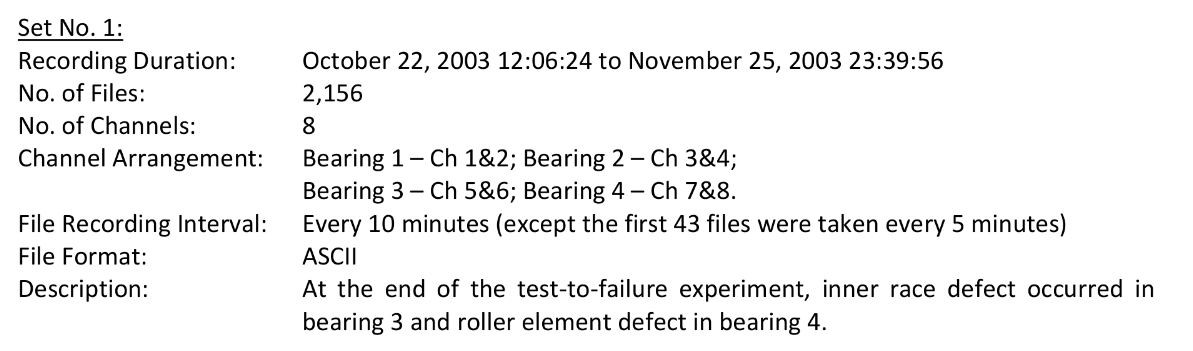

In [7]:
# Data Description

img_path = "/home/shravan/Pictures/Screenshots/Screenshot from 2024-06-12 01-10-23.png"
from PIL import Image
Image.open(img_path)

In [8]:
df_col5 = pd.DataFrame()
df_col6 = pd.DataFrame()
df_col7 = pd.DataFrame()
df_col8 = pd.DataFrame()
for i in range(23):
    end = i
    df2 = pd.read_csv(data_per_day_len[end][0], delimiter="\t", names=column_names)
    df_col5 = pd.concat([df_col5,df2['Col5']], ignore_index=True)
    df_col6 = pd.concat([df_col6,df2['Col6']], ignore_index=True)
    df_col7 = pd.concat([df_col7,df2['Col7']], ignore_index=True)
    df_col8 = pd.concat([df_col8,df2['Col8']], ignore_index=True)
    

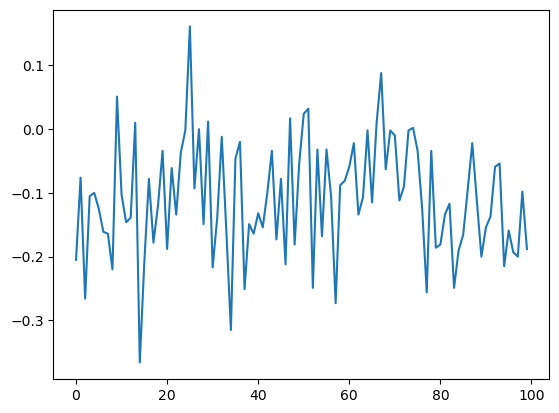

In [9]:
plt.plot(df_col5[0][:100])

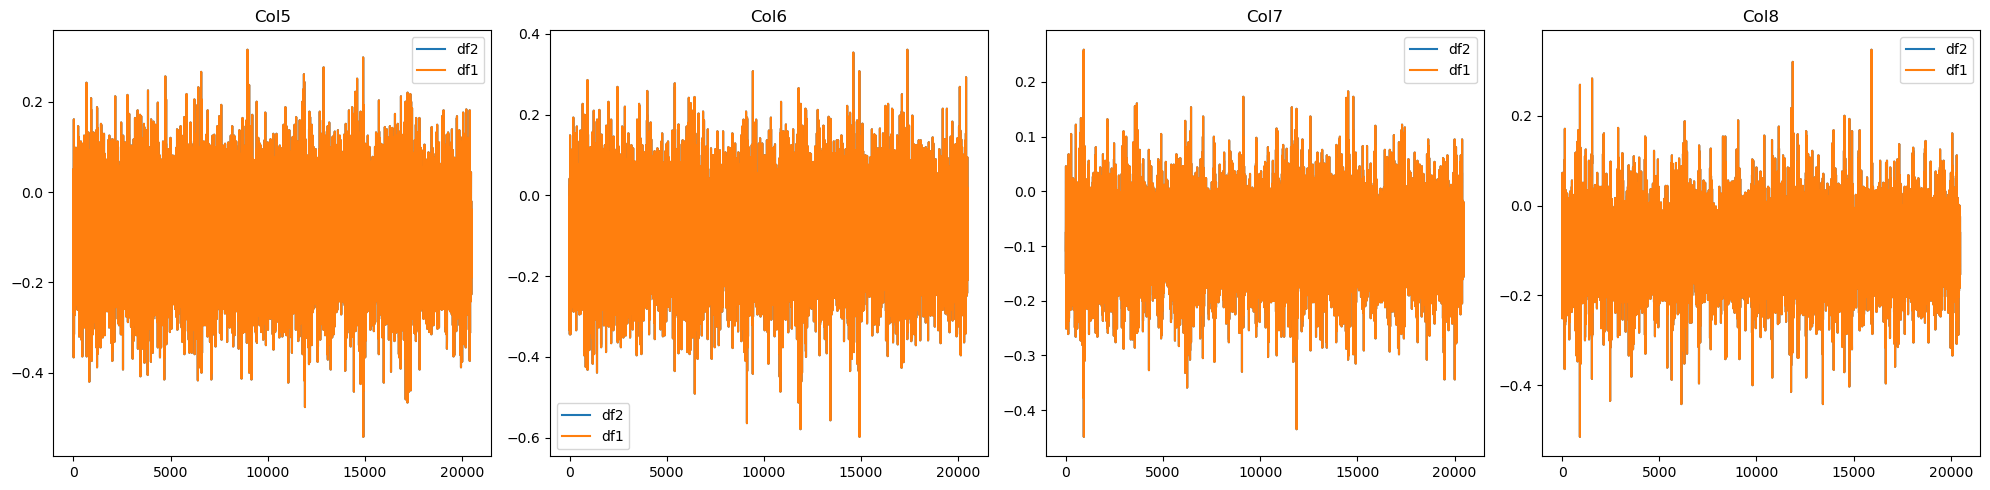

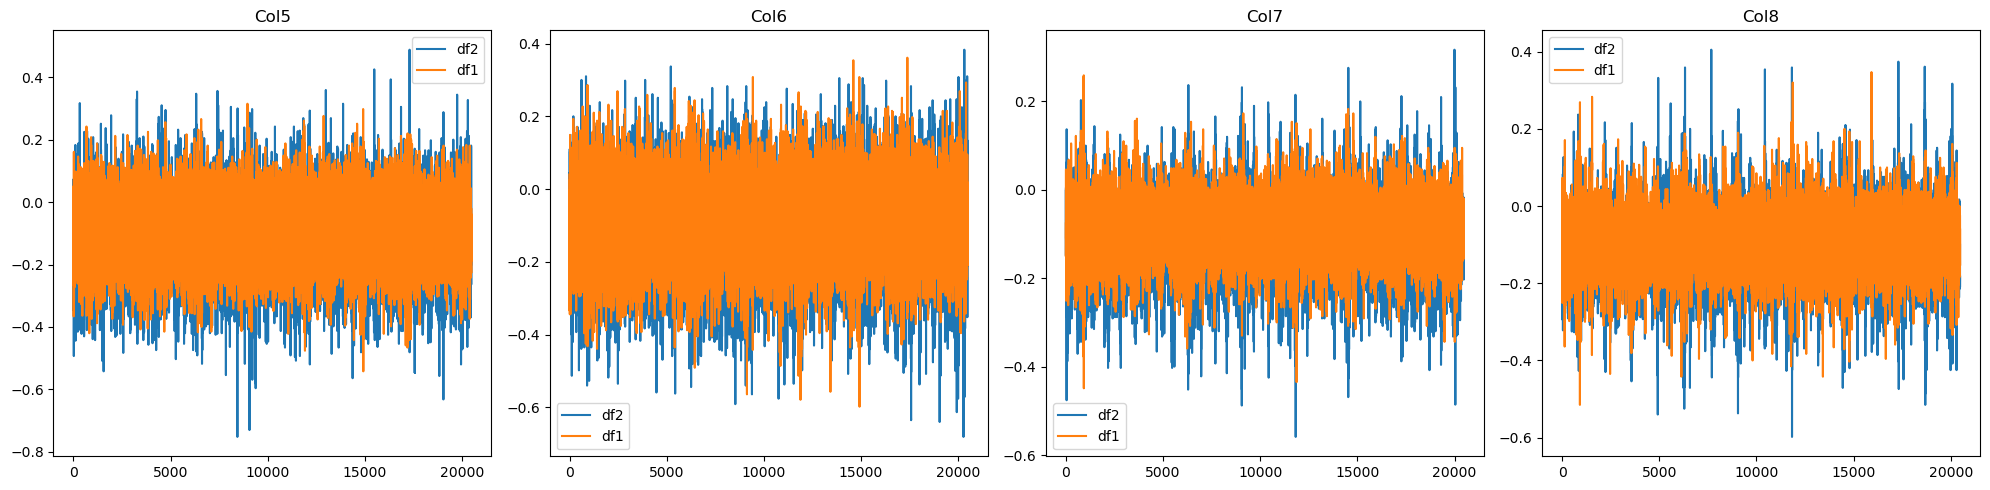

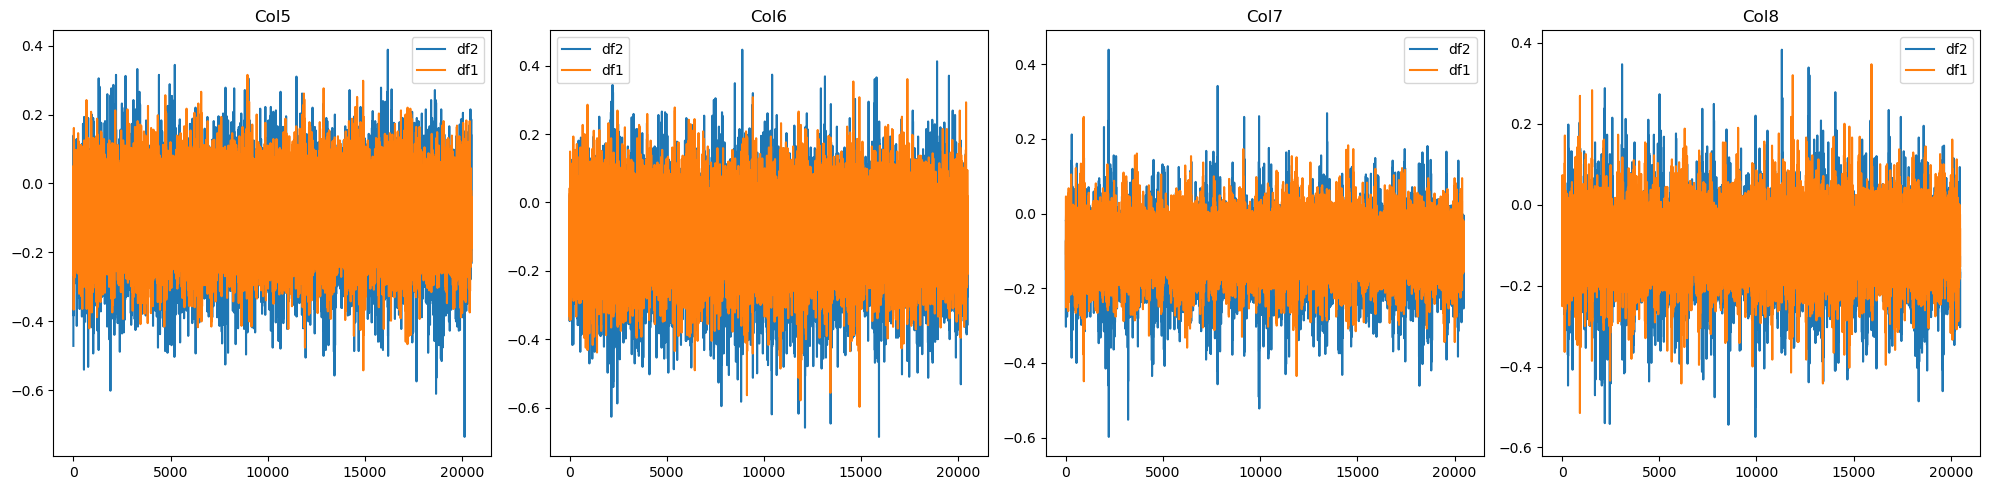

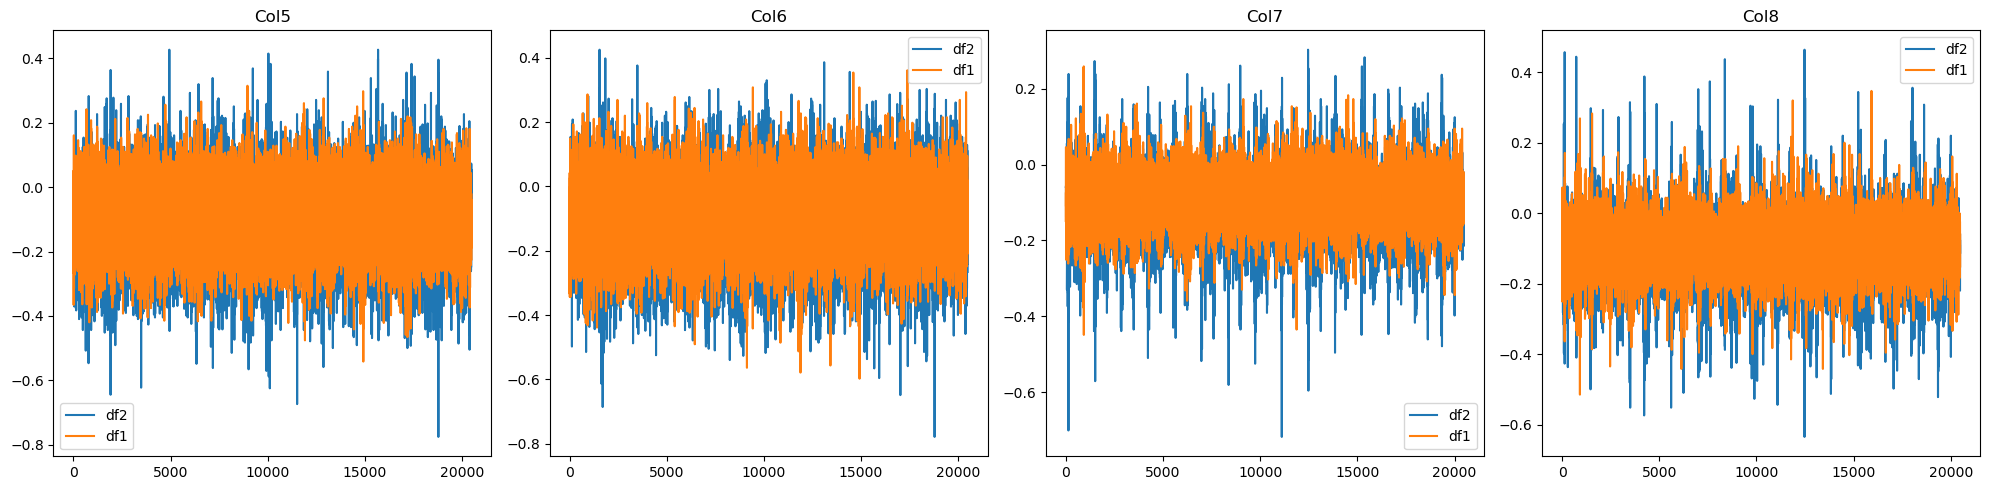

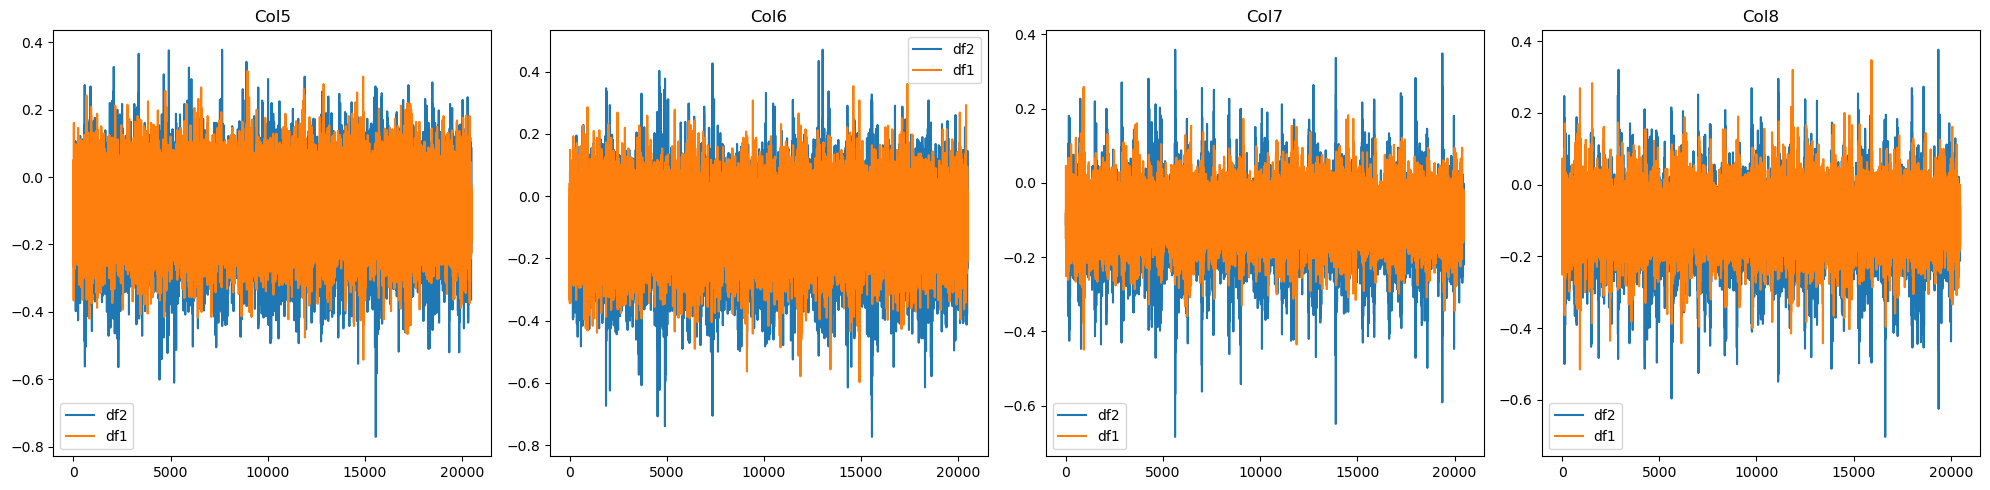

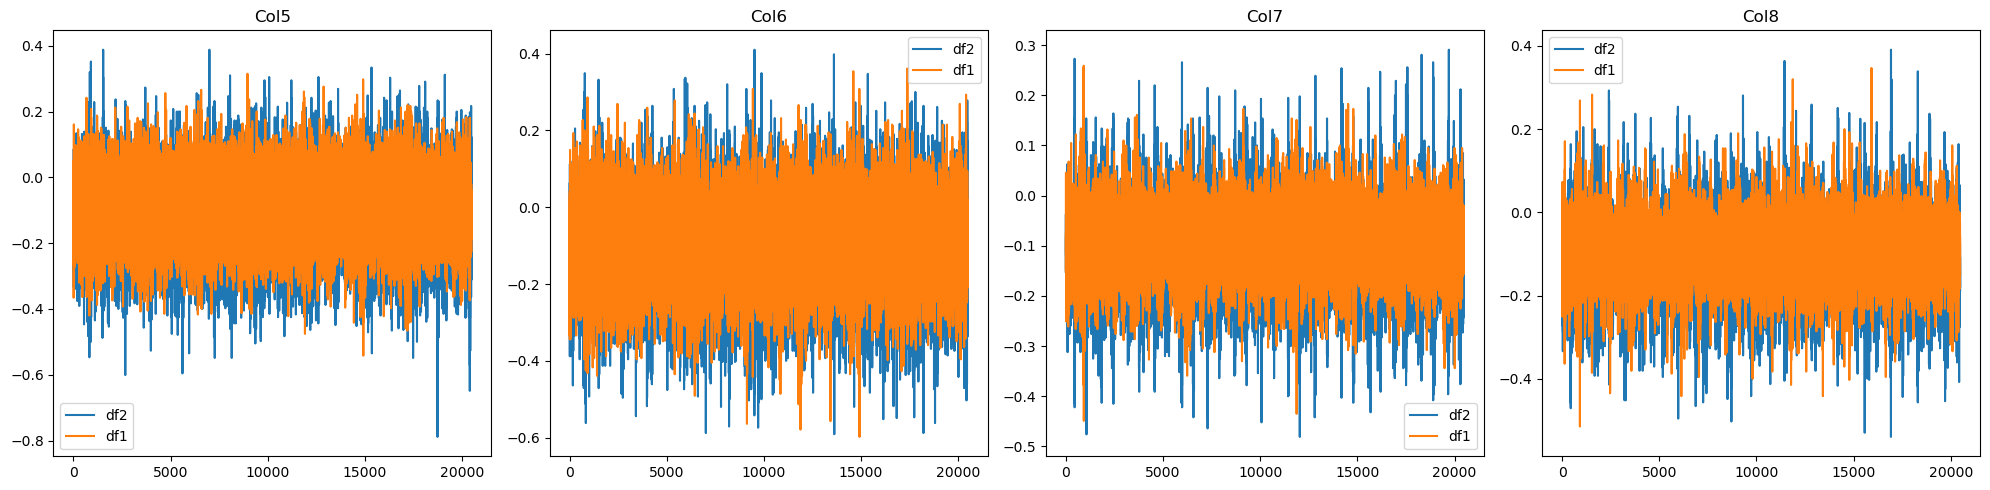

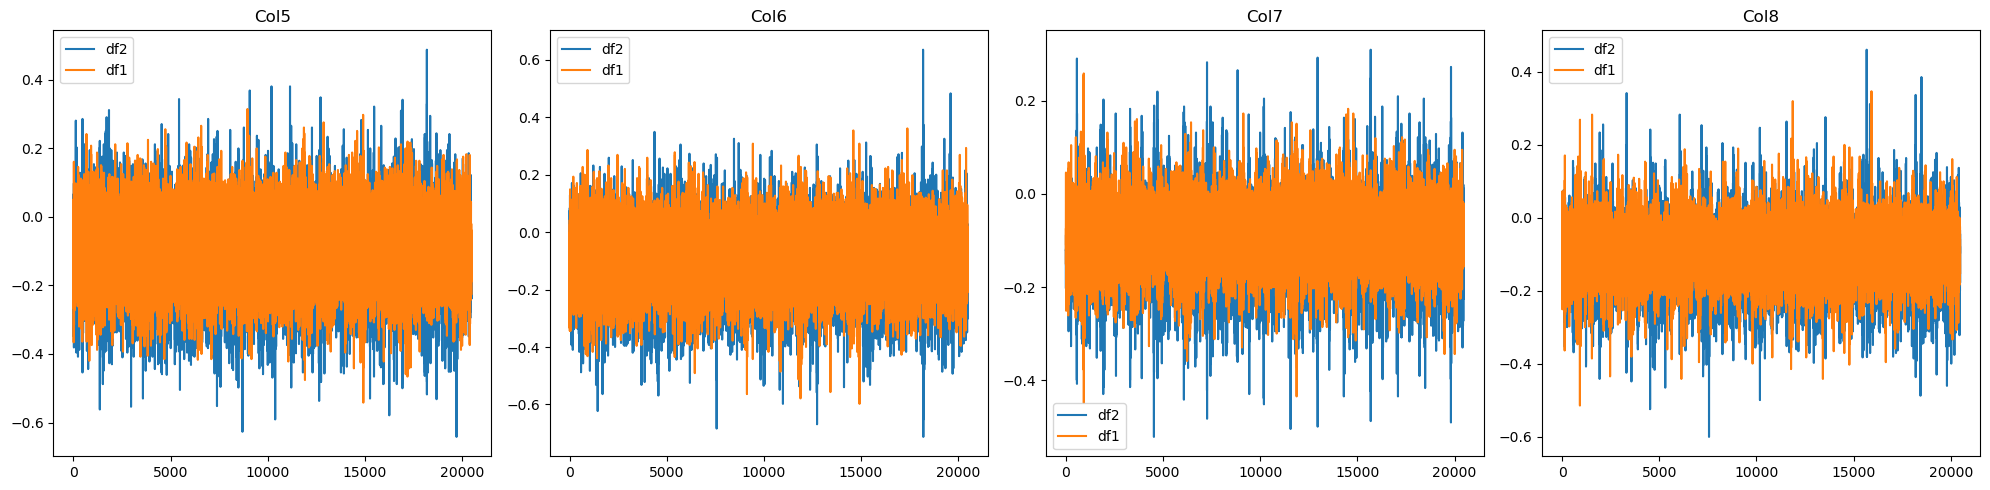

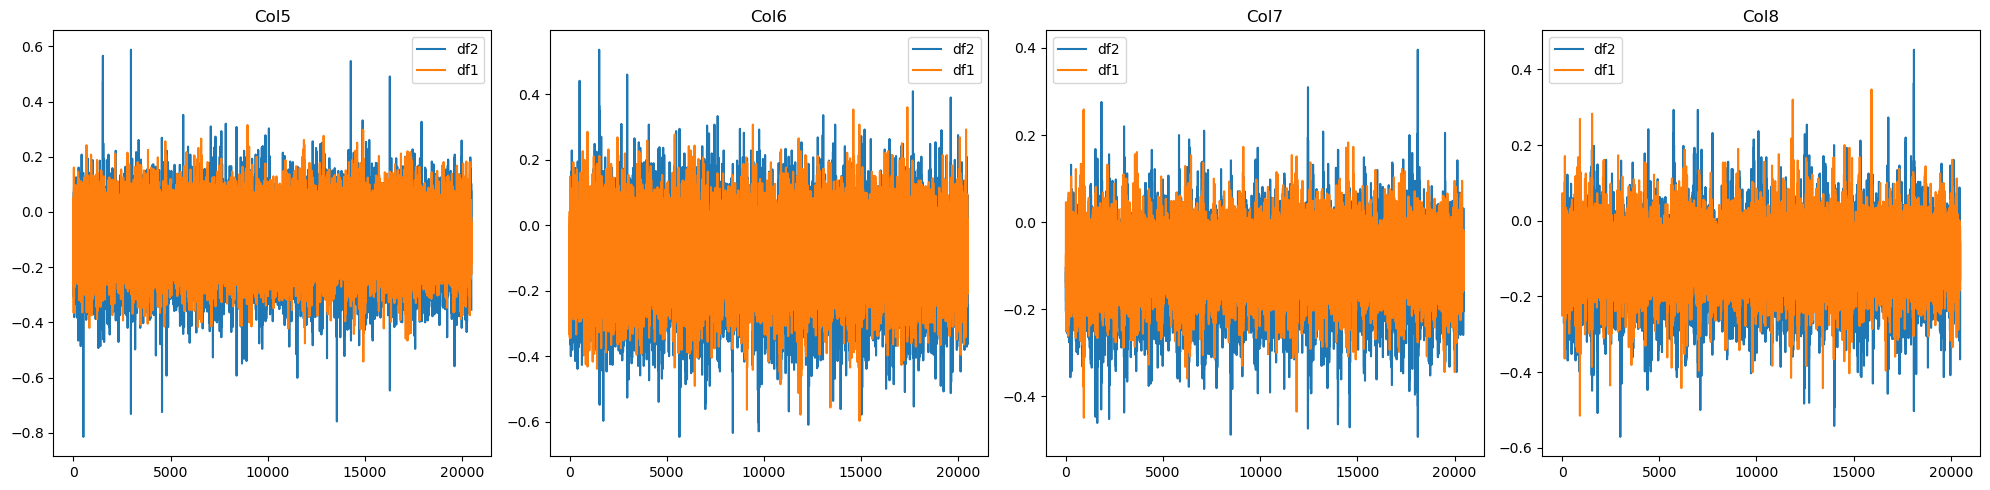

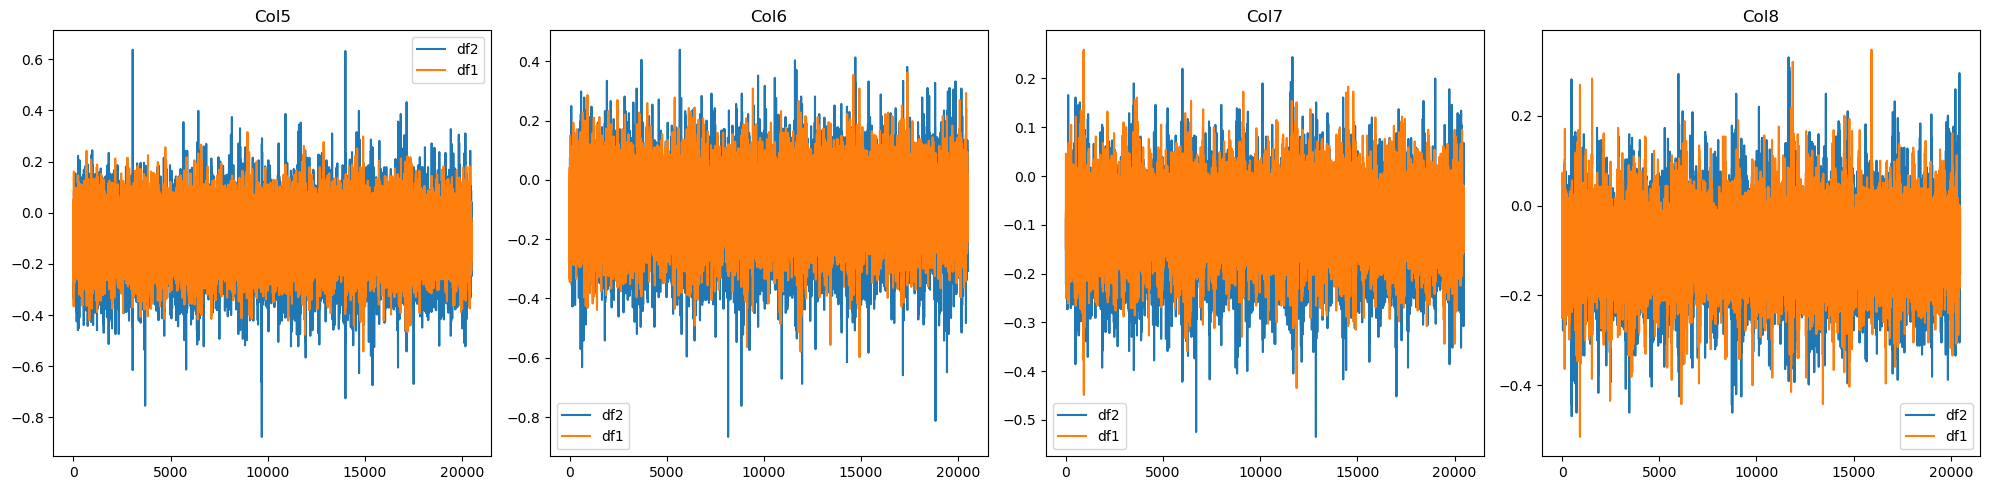

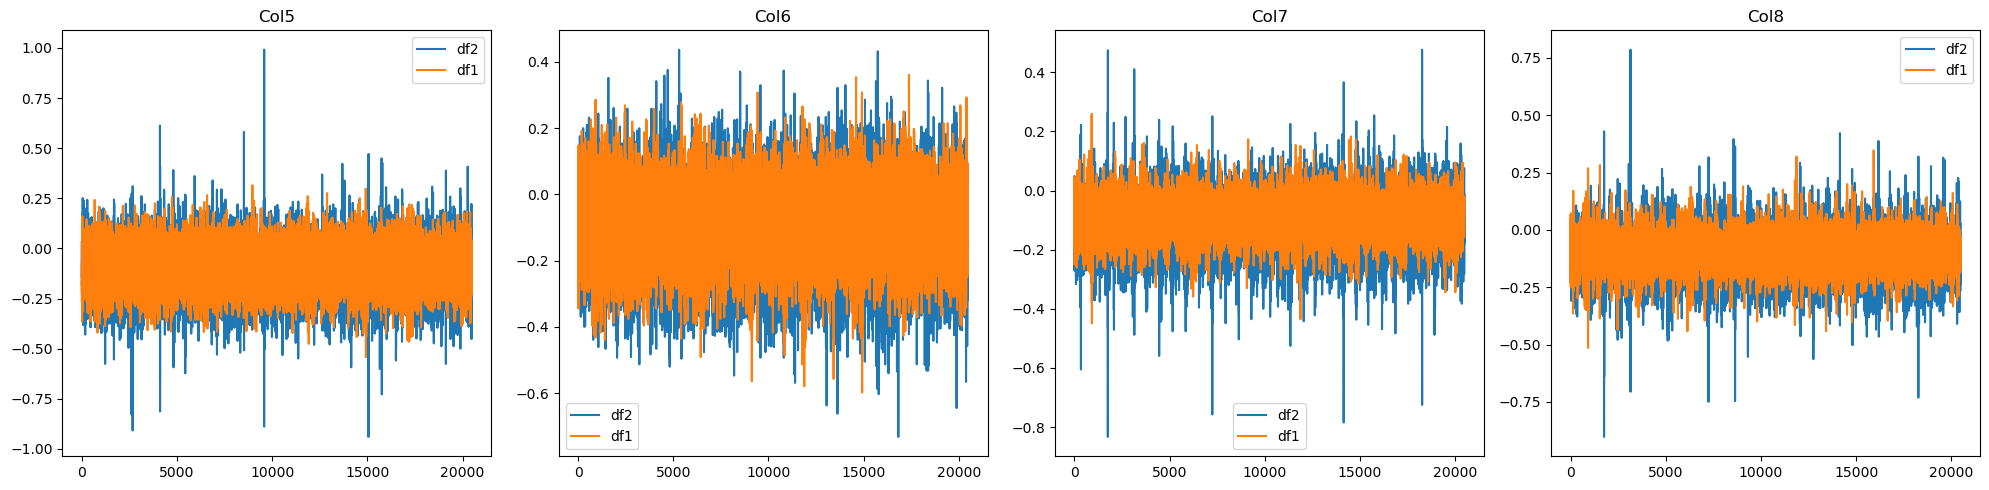

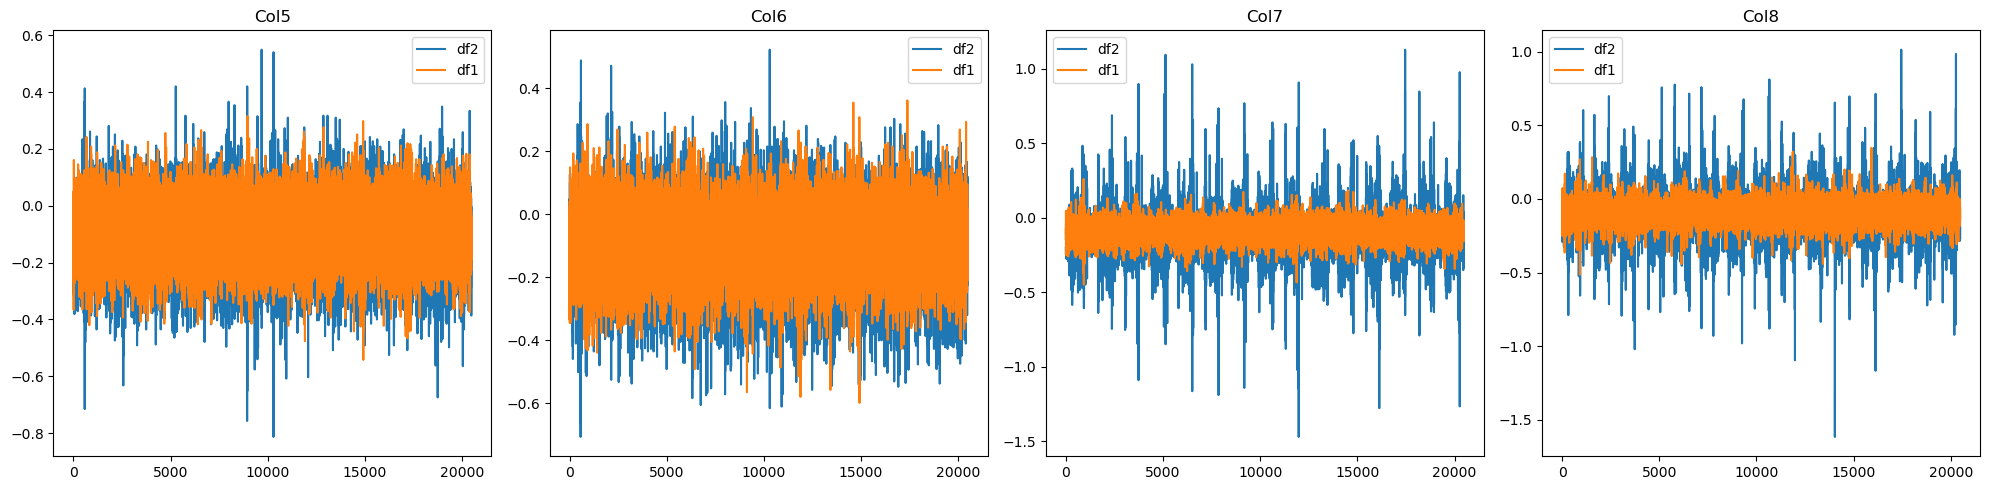

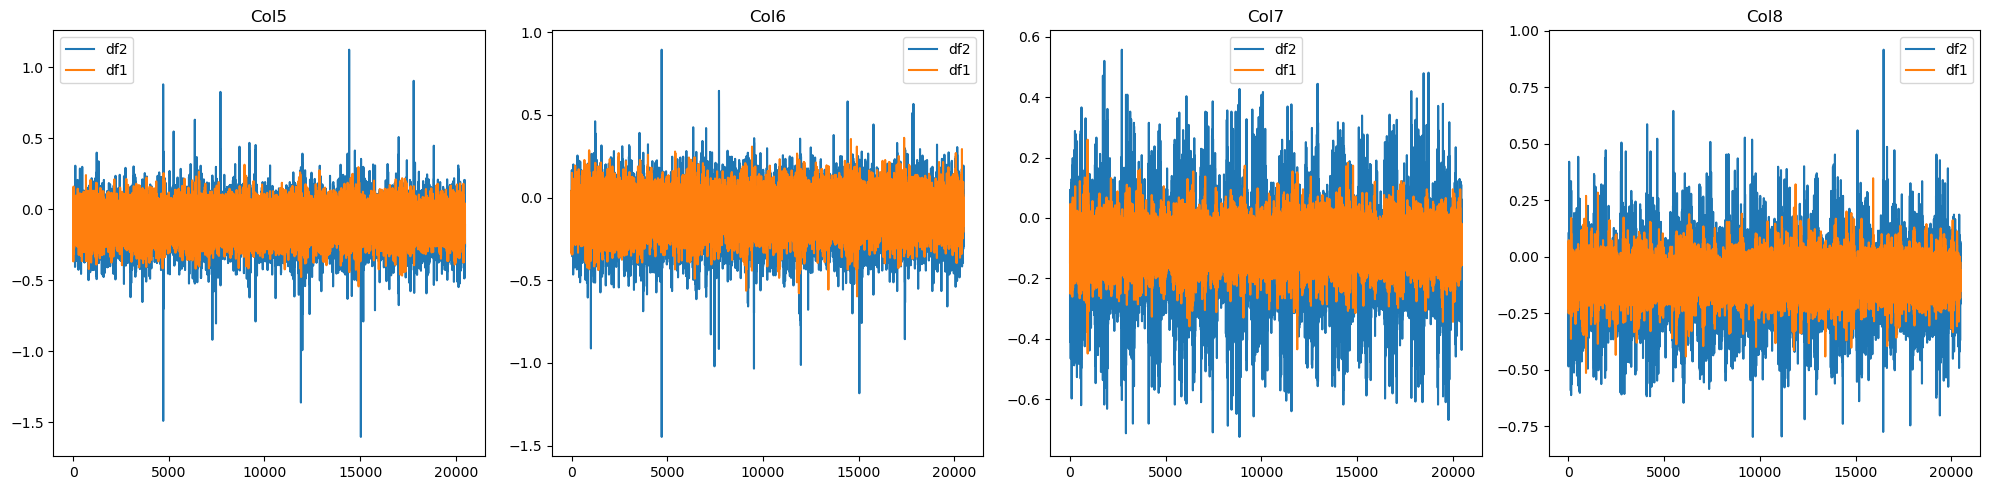

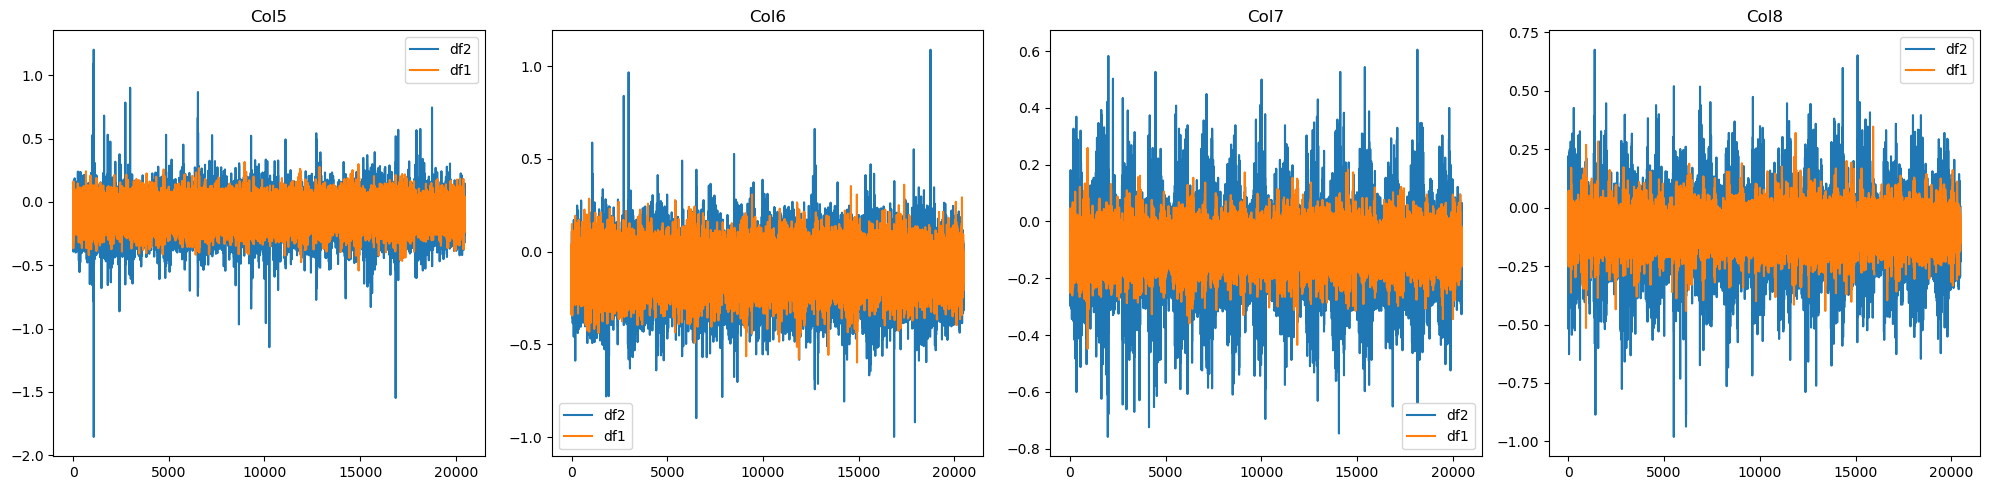

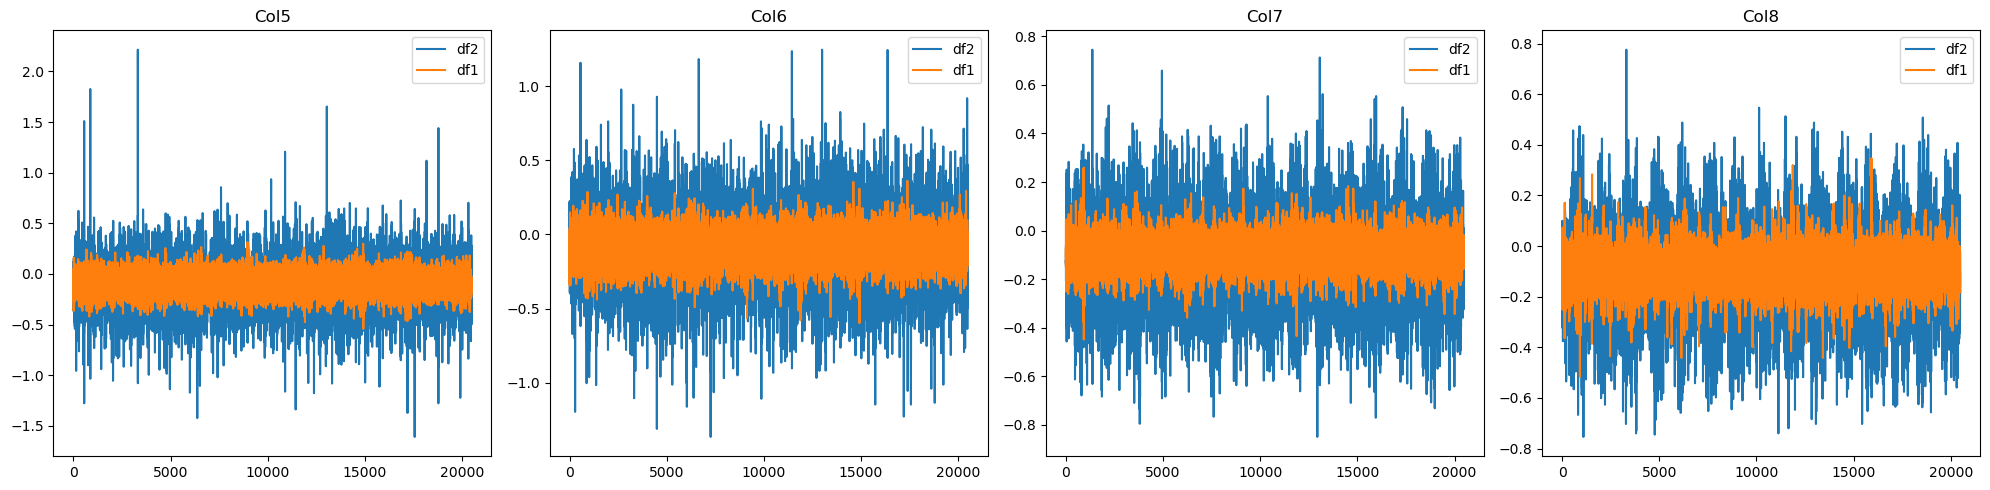

In [132]:
start = 0
end = 0 
for i in range(23):
    end = i
    column_names = ["Col1", "Col2", "Col3", "Col4", "Col5", "Col6", "Col7", "Col8"]
    df1 = pd.read_csv(data_per_day_len[start][0], delimiter="\t", names=column_names)
    df2 = pd.read_csv(data_per_day_len[end][0], delimiter="\t", names=column_names)
    # blue is data in end days
    # orange is data in start days
    defect_channels = ['Col5', 'Col6', 'Col7', 'Col8']
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for i, col in enumerate(defect_channels):
        axes[i].plot(df2[col], label='df2')
        axes[i].plot(df1[col], label='df1')
        axes[i].set_title(col)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

In [10]:
def plot_fft(data, sampling_frequency):
    """
    Plots the FFT of the given data with the provided sampling frequency.
    
    Parameters:
    - data: array-like, the input signal data points.
    - sampling_frequency: float, the sampling frequency of the data.
    """
    data = np.array(data)
    # Number of sample points
    N = len(data)
    
    # Compute the FFT
    fft_values = np.fft.fft(data)
    
    # Compute the corresponding frequencies
    freq = np.fft.fftfreq(N, d=1/sampling_frequency)
    
    # Only take the positive half of the frequencies and magnitudes (symmetry in FFT output)
    positive_freqs = freq[:N//2]
    magnitudes = np.abs(fft_values)[:N//2]
    
    return positive_freqs, magnitudes
    # Plot the FFT
    plt.figure(figsize=(5, 5))
    plt.plot(positive_freqs, magnitudes)
    plt.title('FFT of the Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

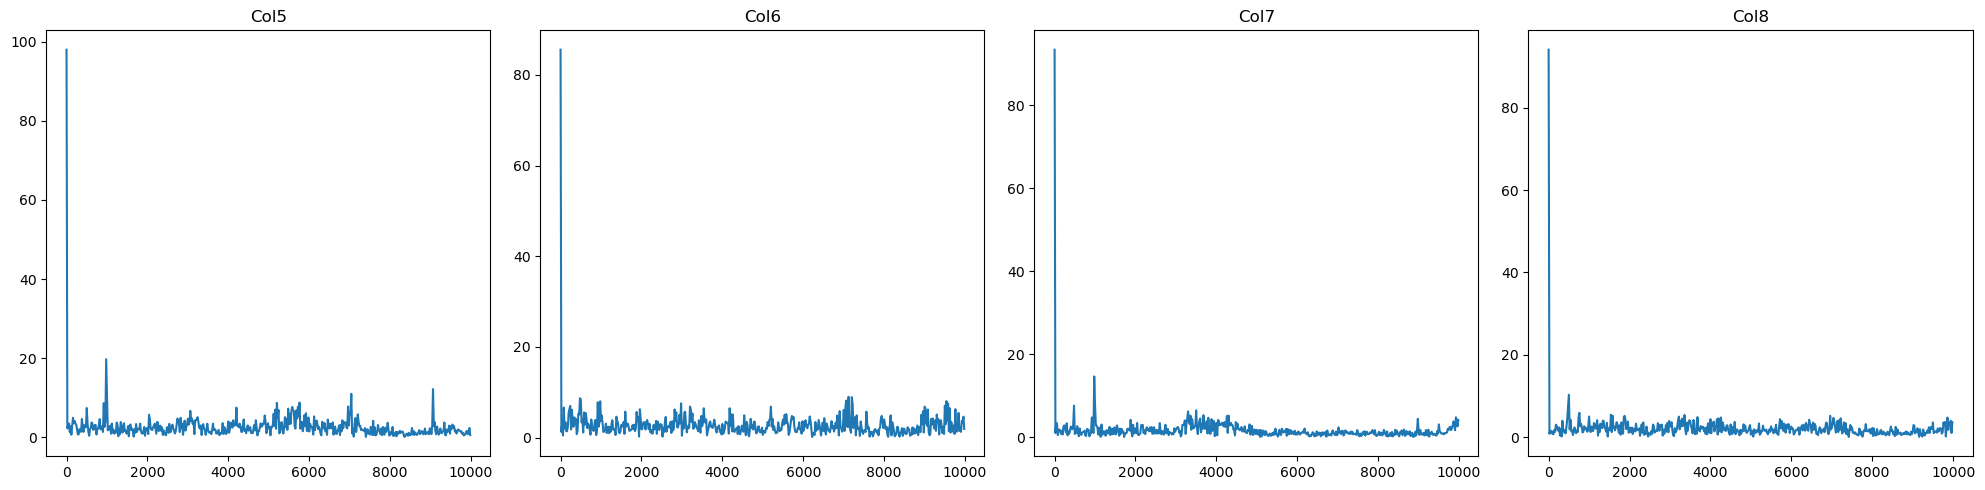

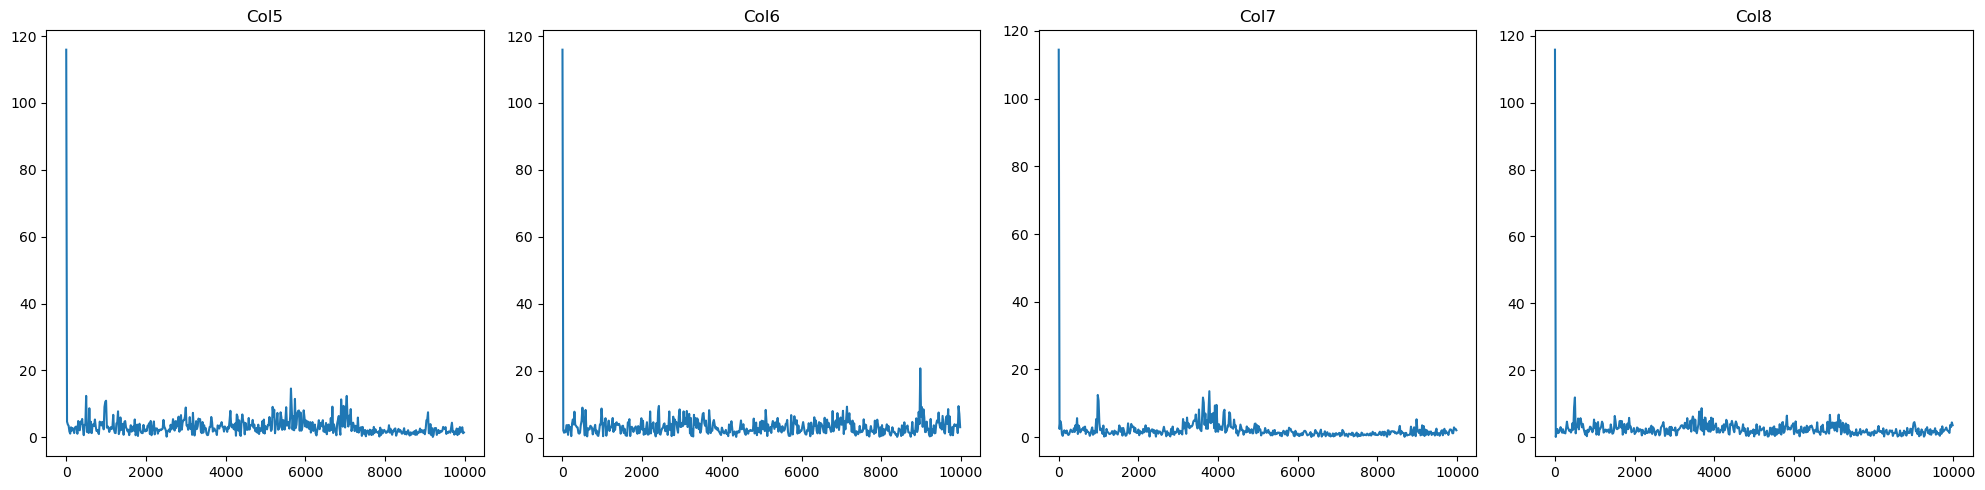

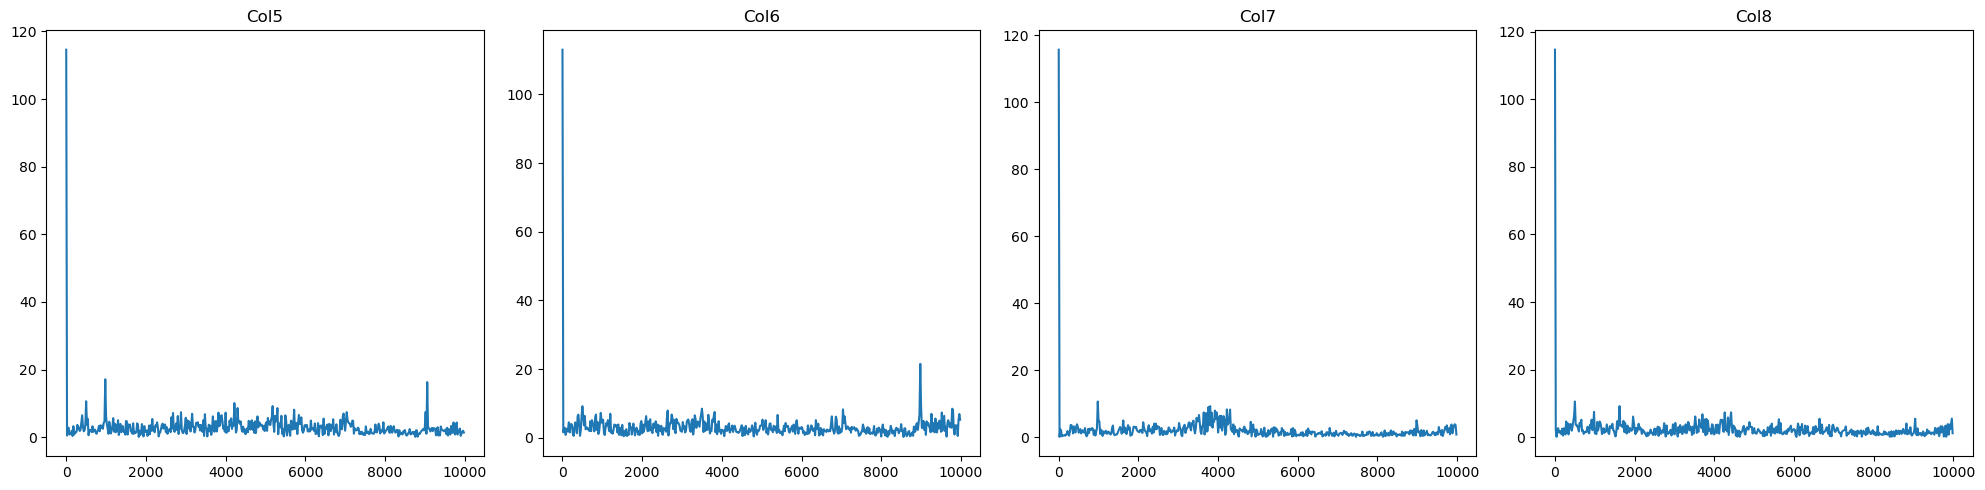

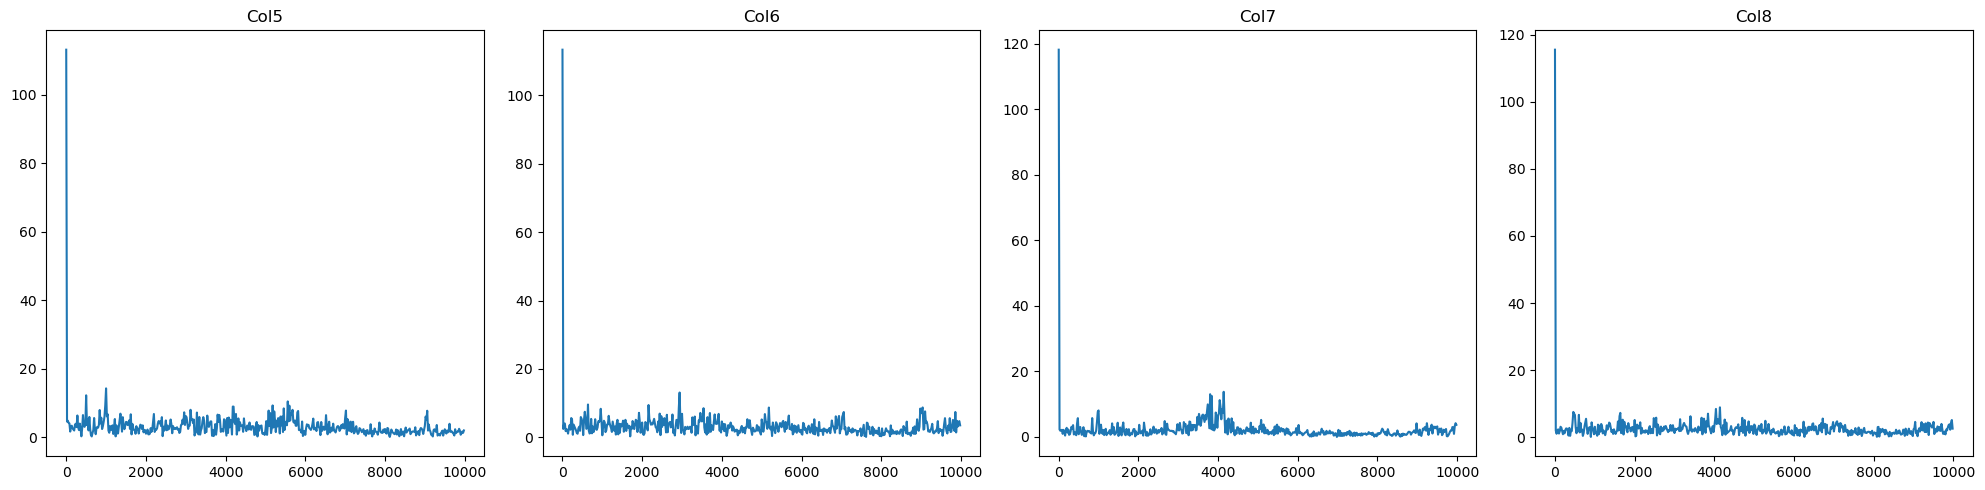

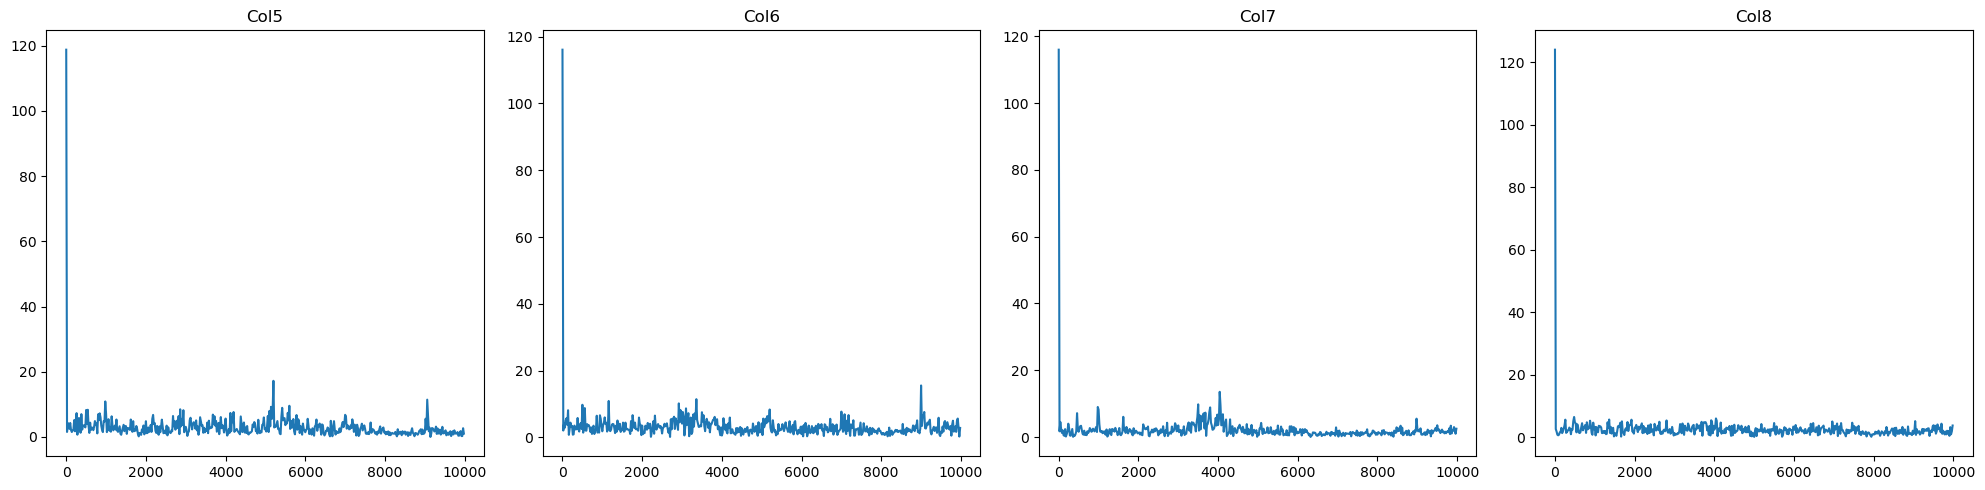

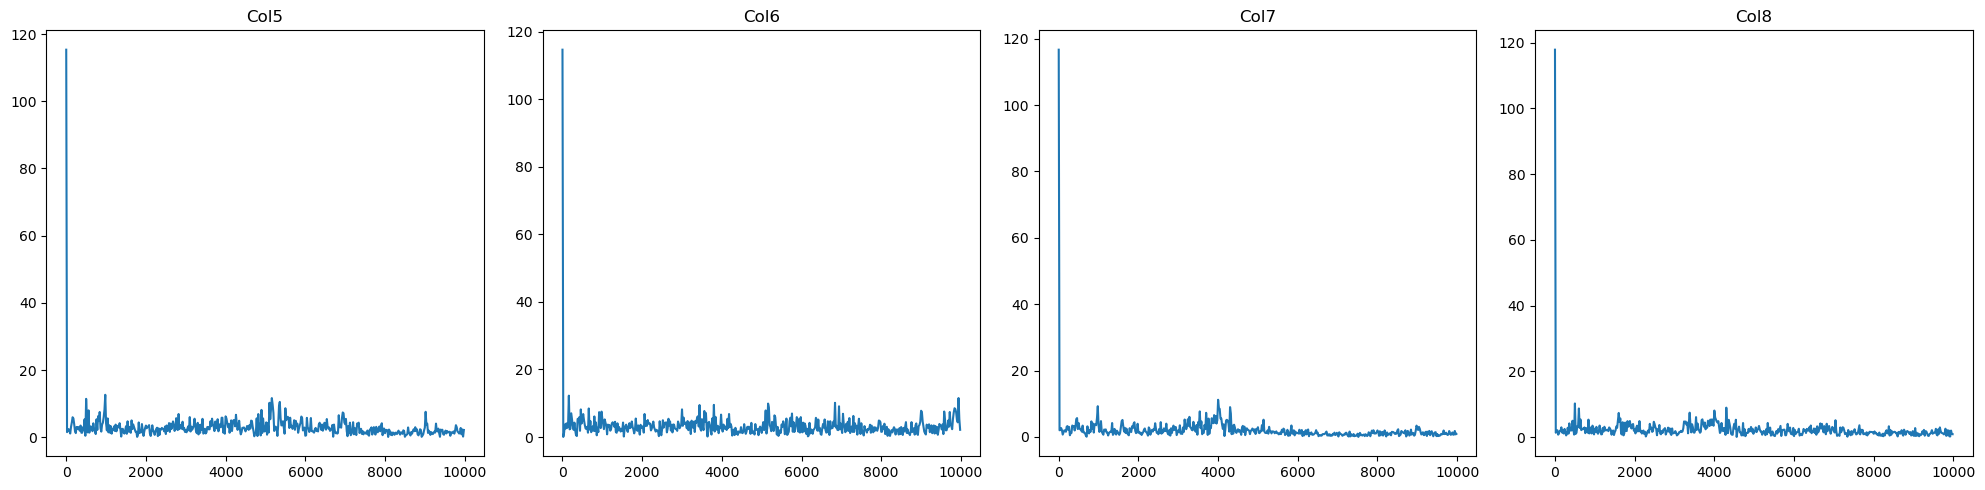

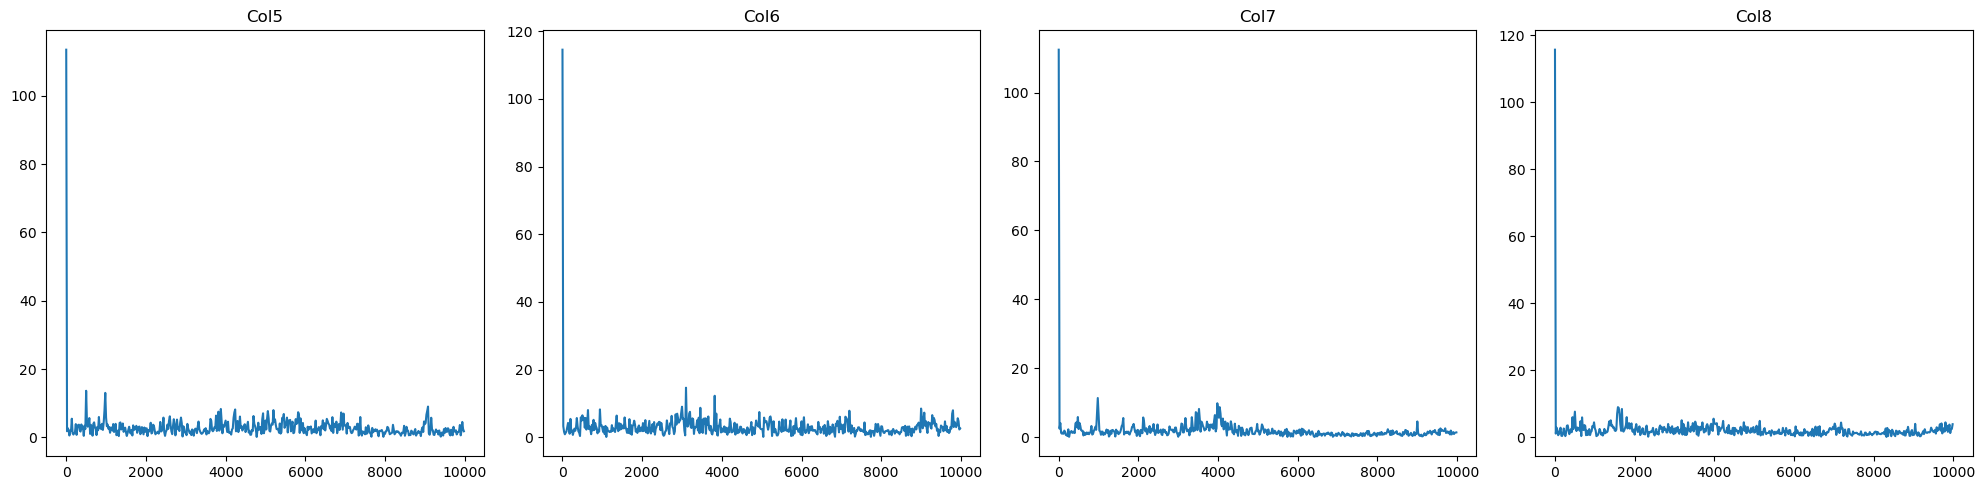

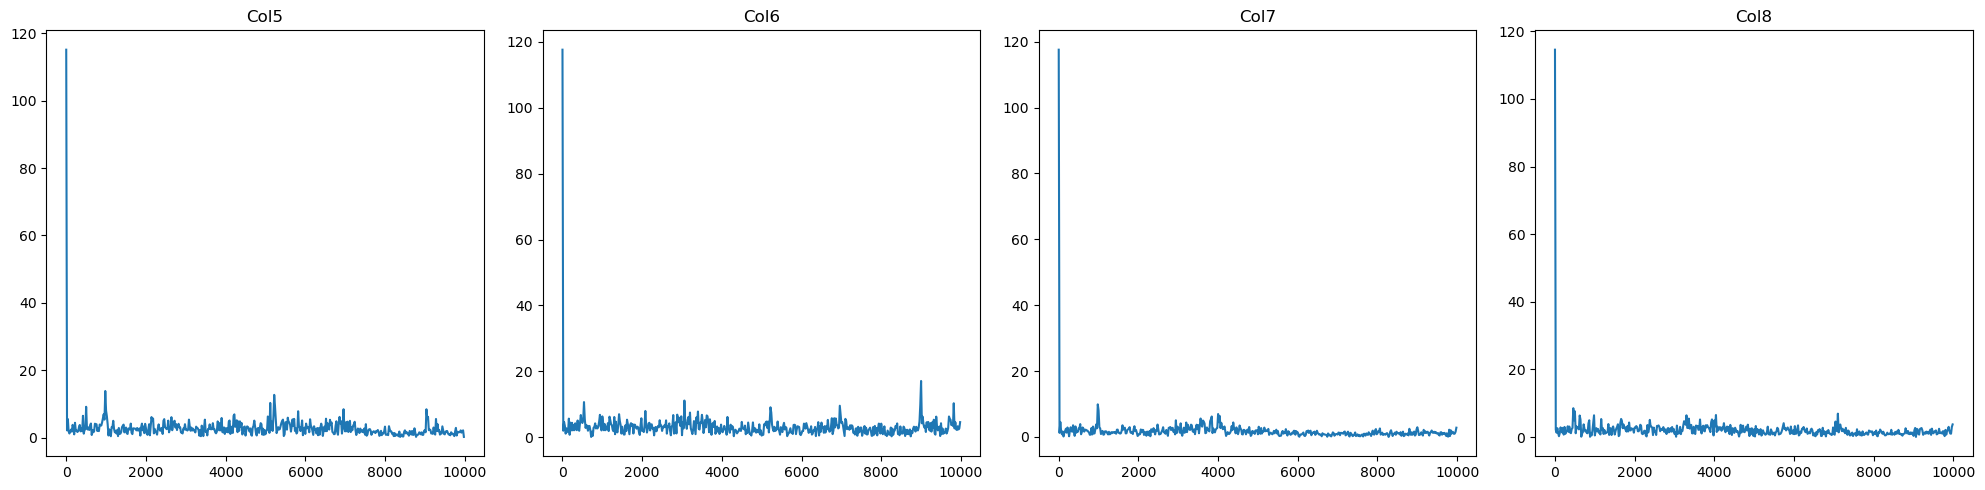

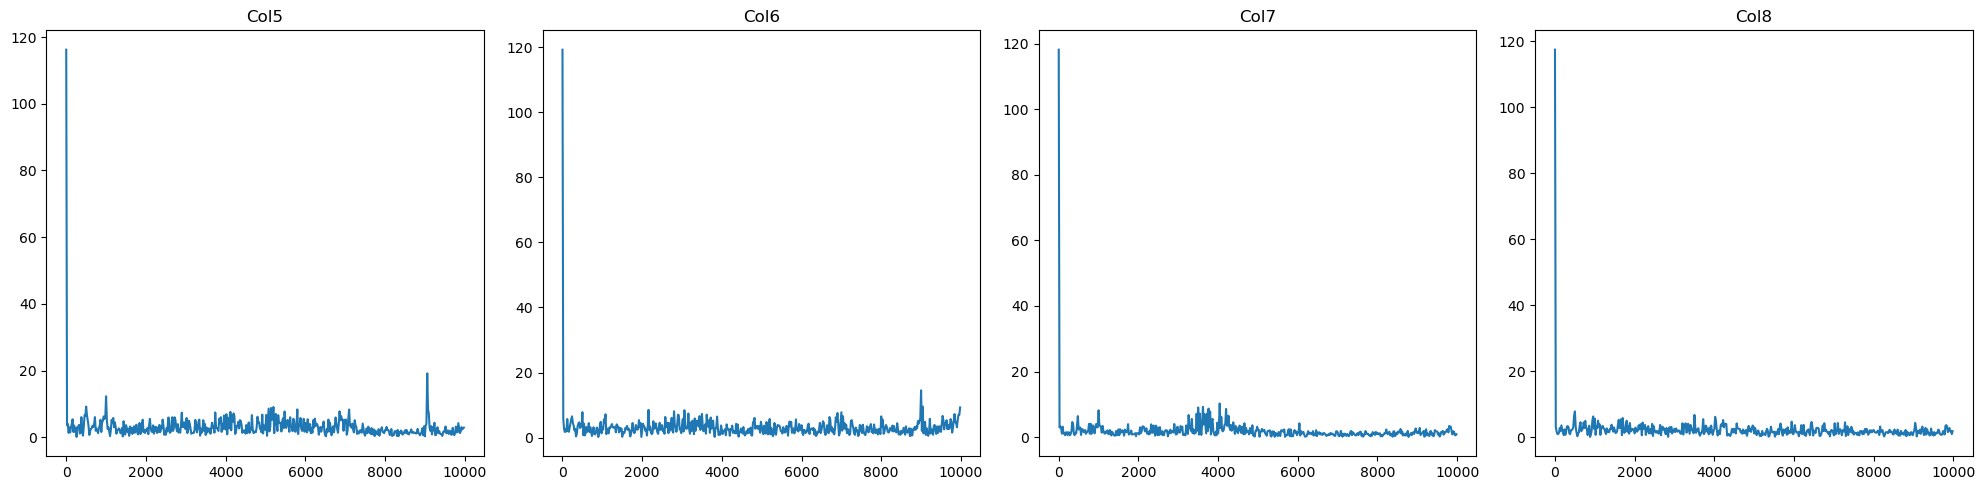

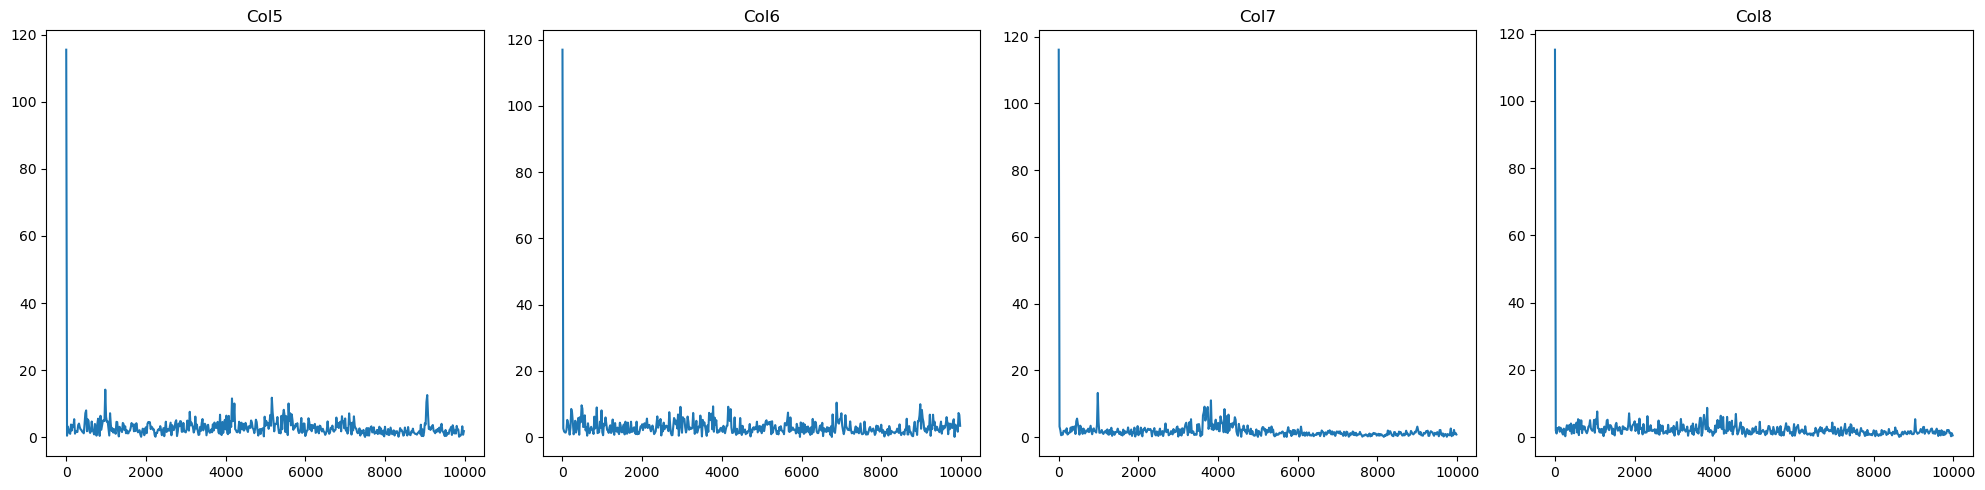

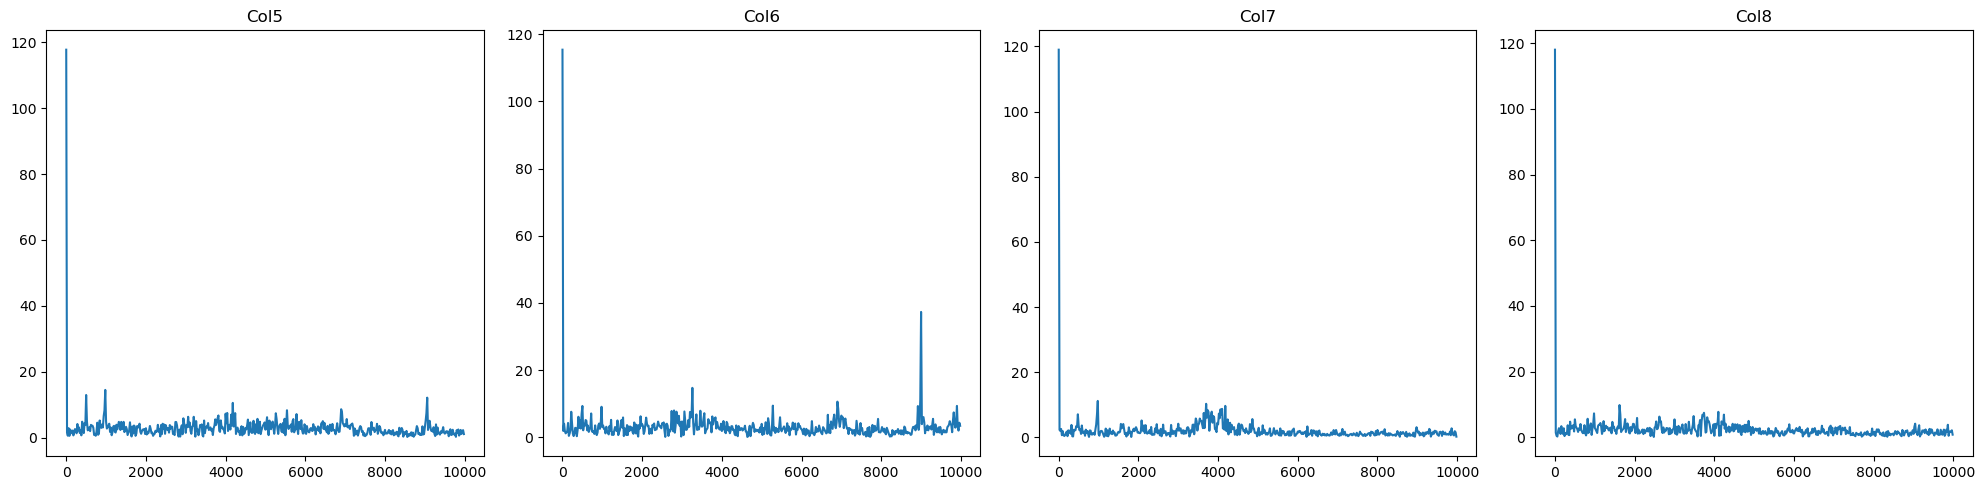

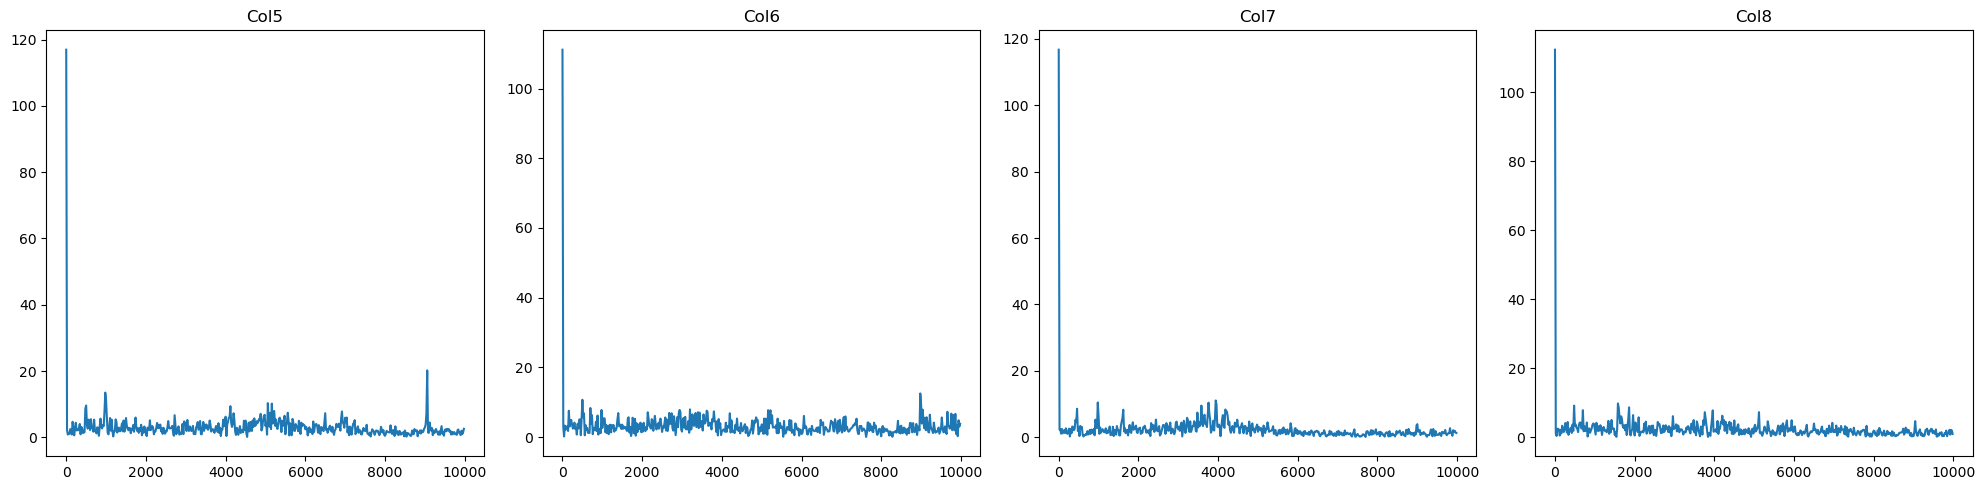

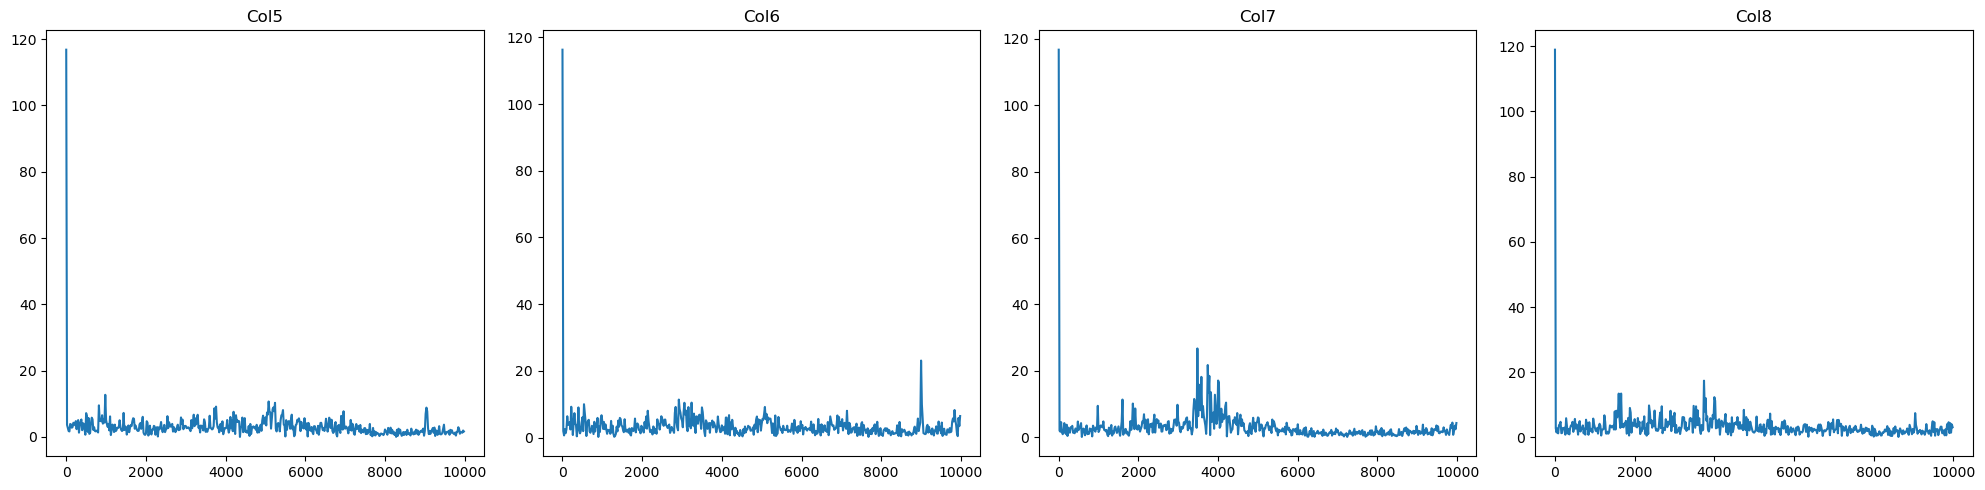

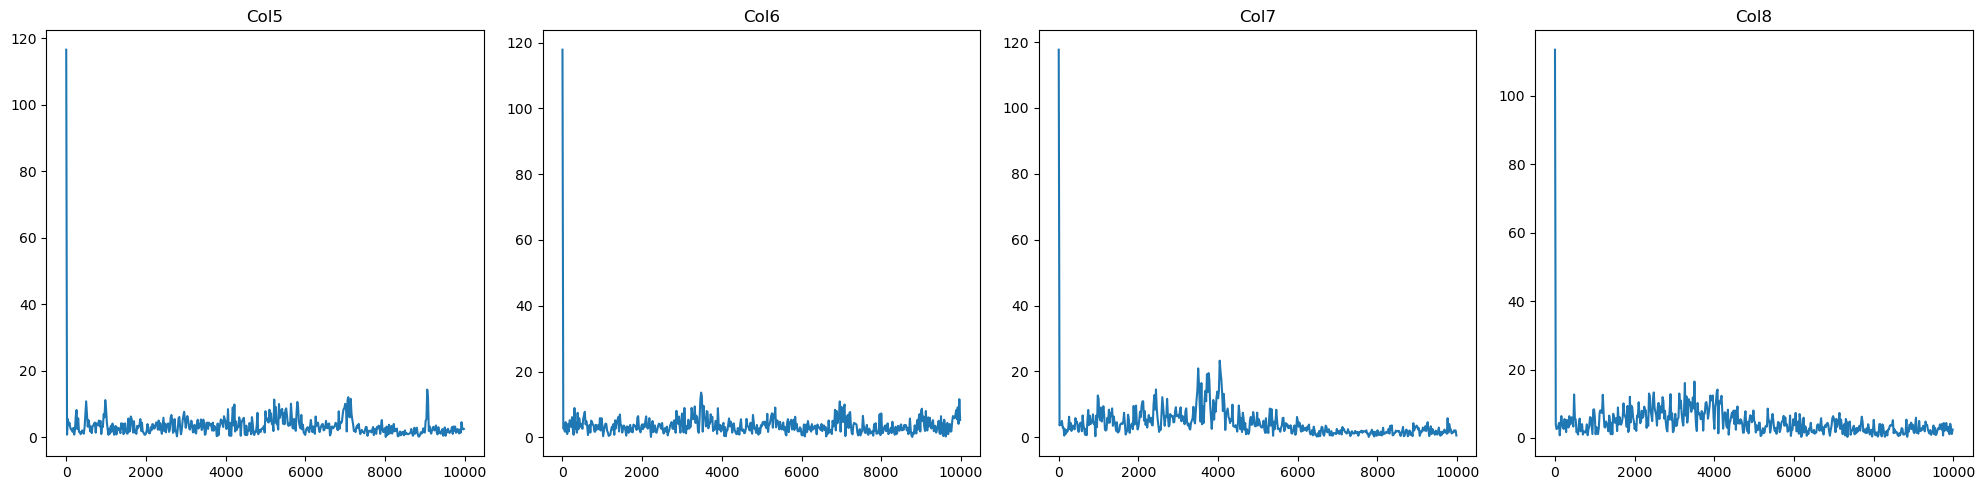

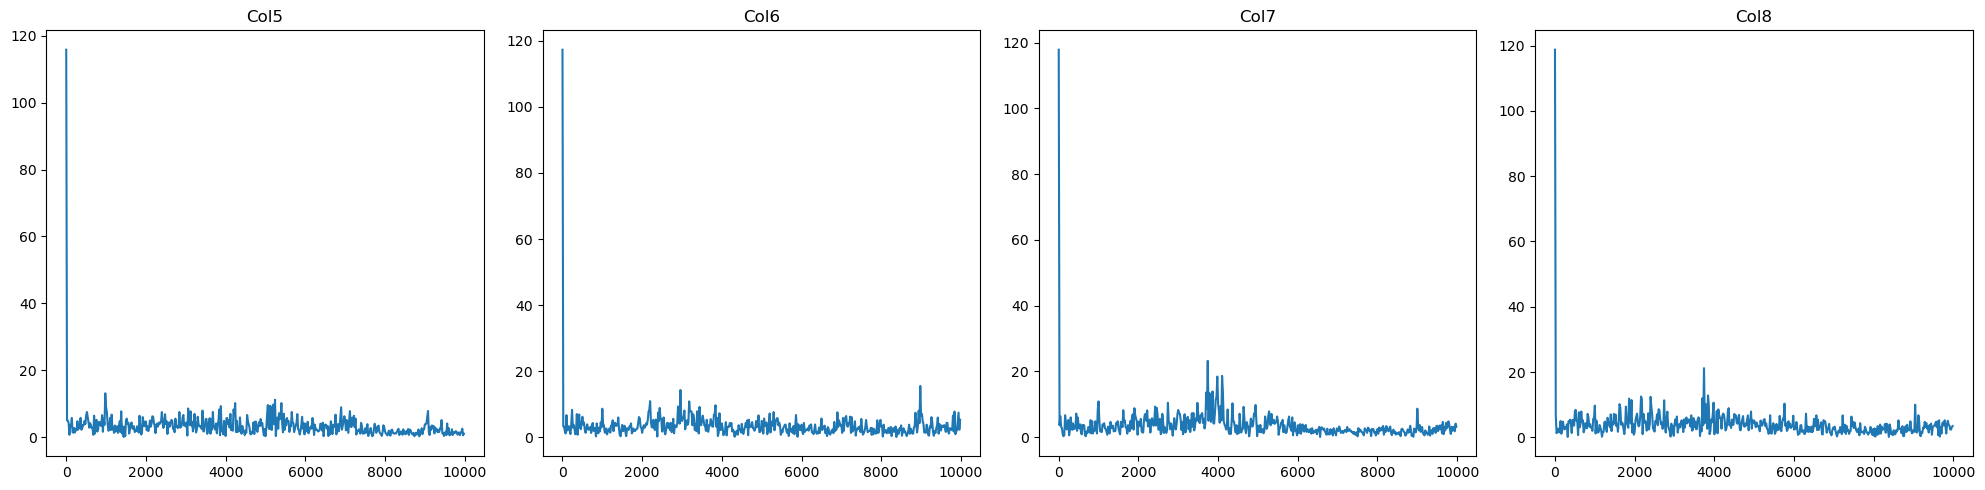

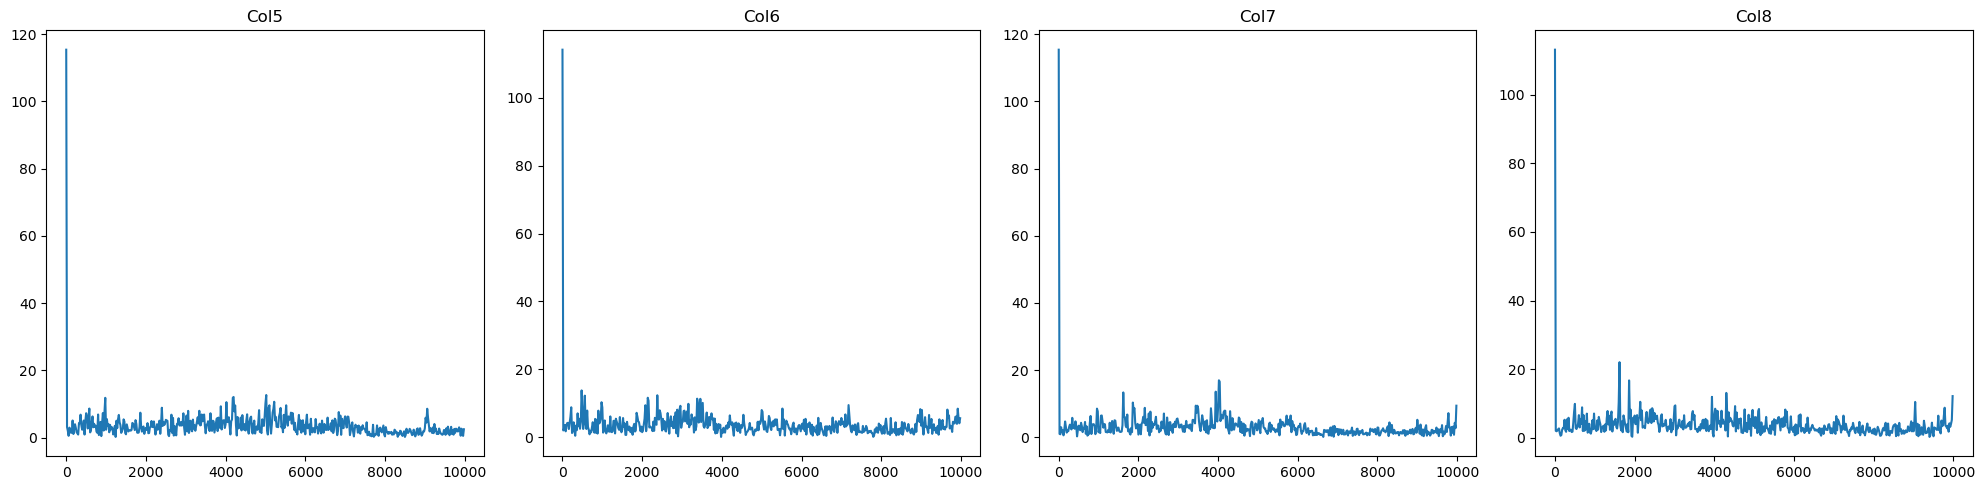

In [12]:
start = 0
end = 0 
for i in range(23):
    end = i
    column_names = ["Col1", "Col2", "Col3", "Col4", "Col5", "Col6", "Col7", "Col8"]
    df = pd.read_csv(data_per_day_len[end][0], delimiter="\t", names=column_names)
    # blue is data in end days
    # orange is data in start days
    defect_channels = ['Col5', 'Col6', 'Col7', 'Col8']
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for i, col in enumerate(defect_channels):
        x, y = plot_fft(df[col], 20000)
        axes[i].plot(x,y)
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()